In [30]:
%%capture --no-stderr
%pip install -r requirements.txt   

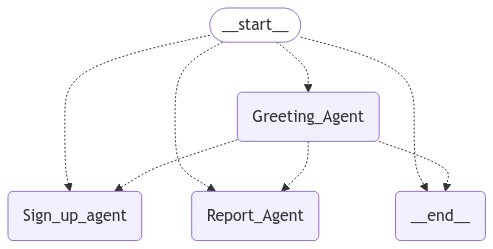

In [31]:
from IPython.display import Image, display
from stateful_routing import graph, AgentState

display(Image(graph.get_graph().draw_mermaid_png()))

Starting the conversation with new thread_id.

The first request is routed to the default Greeting node.

In [32]:


import random
from langchain_core.messages import HumanMessage

thread_id = str(random.randint(1, 1000))
config  = {'configurable': {"thread_id":thread_id}}
state = AgentState(messages=[], current_agnet=None)

state['messages'].append(HumanMessage(content="Hello", name="User"))

state = graph.invoke(state, config)

for m in state['messages']:
    m.pretty_print()


================================ Human Message =================================
Name: User

Hello
================================== Ai Message ==================================
Name: Greeting_Agent

Hello. I'm an automated assistant. How can I help you today?


Greeting node can identify the users intent and redirect the user to the appropriate agent.

When intent is certain it uses `redirect_tool` to pass the control to the next agent.
`redirect_tool` updates the `current_route` argument with the next agent name.
Routing edge after greeting agent picks up the new route and redirect the request to the next agent.

In [33]:
state['messages'].append(HumanMessage(content="I'd like to open an account", name="User"))

state = graph.invoke(state, config)

for m in state['messages']:
    m.pretty_print()

Routing to Sign_up_agent
================================ Human Message =================================
Name: User

Hello
================================== Ai Message ==================================
Name: Greeting_Agent

Hello. I'm an automated assistant. How can I help you today?
================================ Human Message =================================
Name: User

I'd like to open an account
================================== Ai Message ==================================
Name: Greeting_Agent
Tool Calls:
  redirect_tool (call_90fxzfdaQtcJAZnSGcgde66d)
 Call ID: call_90fxzfdaQtcJAZnSGcgde66d
  Args:
    next_agent: Sign_up_agent
================================= Tool Message =================================
Name: redirect_tool

You will be redirected to Sign_up_agent
================================== Ai Message ==================================
Name: Sign_up_agent

Great! I can help you with that. I'll need to collect some information from you. Could you please provide y

Now every new request will be routed to the same agent by the `pre_greeting_routing` node. 
Until it completes it's task.

In [34]:
from langchain_core.messages import HumanMessage

state['messages'].append(HumanMessage(content="Sure.  My name is John Doe.", name="User"))

state = graph.invoke(state, config)

for m in state['messages']:
    m.pretty_print()

Routing to Sign_up_agent
================================ Human Message =================================
Name: User

Hello
================================== Ai Message ==================================
Name: Greeting_Agent

Hello. I'm an automated assistant. How can I help you today?
================================ Human Message =================================
Name: User

I'd like to open an account
================================== Ai Message ==================================
Name: Greeting_Agent
Tool Calls:
  redirect_tool (call_90fxzfdaQtcJAZnSGcgde66d)
 Call ID: call_90fxzfdaQtcJAZnSGcgde66d
  Args:
    next_agent: Sign_up_agent
================================= Tool Message =================================
Name: redirect_tool

You will be redirected to Sign_up_agent
================================== Ai Message ==================================
Name: Sign_up_agent

Great! I can help you with that. I'll need to collect some information from you. Could you please provide y

In [35]:
from langchain_core.messages import HumanMessage

state['messages'].append(HumanMessage(content="john.doe@example.com", name="User"))

state = graph.invoke(state, config)

for m in state['messages']:
    m.pretty_print()

Routing to Sign_up_agent
CREATING USER John Doe john.doe@example.com
================================ Human Message =================================
Name: User

Hello
================================== Ai Message ==================================
Name: Greeting_Agent

Hello. I'm an automated assistant. How can I help you today?
================================ Human Message =================================
Name: User

I'd like to open an account
================================== Ai Message ==================================
Name: Greeting_Agent
Tool Calls:
  redirect_tool (call_90fxzfdaQtcJAZnSGcgde66d)
 Call ID: call_90fxzfdaQtcJAZnSGcgde66d
  Args:
    next_agent: Sign_up_agent
================================= Tool Message =================================
Name: redirect_tool

You will be redirected to Sign_up_agent
================================== Ai Message ==================================
Name: Sign_up_agent

Great! I can help you with that. I'll need to collect some info

In [36]:
from langchain_core.messages import HumanMessage

state['messages'].append(HumanMessage(content="Thank you", name="User"))

state = graph.invoke(state, config)

for m in state['messages']:
    m.pretty_print()

Routing to Greeting_Agent
================================ Human Message =================================
Name: User

Hello
================================== Ai Message ==================================
Name: Greeting_Agent

Hello. I'm an automated assistant. How can I help you today?
================================ Human Message =================================
Name: User

I'd like to open an account
================================== Ai Message ==================================
Name: Greeting_Agent
Tool Calls:
  redirect_tool (call_90fxzfdaQtcJAZnSGcgde66d)
 Call ID: call_90fxzfdaQtcJAZnSGcgde66d
  Args:
    next_agent: Sign_up_agent
================================= Tool Message =================================
Name: redirect_tool

You will be redirected to Sign_up_agent
================================== Ai Message ==================================
Name: Sign_up_agent

Great! I can help you with that. I'll need to collect some information from you. Could you please provide 